C:\Users\ellio\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


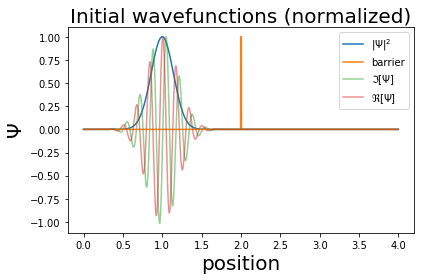

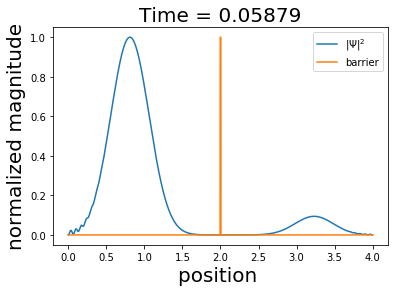

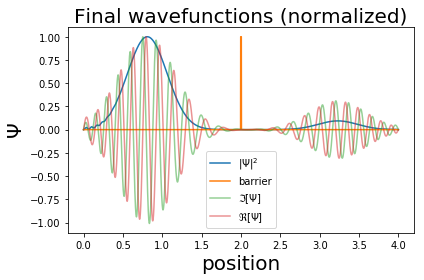

In [16]:
# making the program calss-based made
import numpy as np#iport neccessary libraries
import matplotlib.pyplot as plt

class well:
    def __init__(self, V0, d, ke, sig):#set up the model of he system/infinate well with barrier.
        self.V0 = V0   # potential height
        self.ke = ke   # momentum of the initial wavepacket
        self.k0 = np.sqrt(self.ke * 2 )  # wave vector of electron in m^-1
        self.d = d   # potential barrier width in m
        self.sig = sig   # Initial spread of Gaussian wavefunction
        self.dx = np.minimum((self.d / 25.0), (self.sig / 25.0))  # grid cell size
        self.dt = .9 * 1 / ((1 / ( self.dx ** 2)) + (self.V0 / 2.0))  # time step size
        length = 20 * np.maximum(self.d, self.sig)  # length of the simulation domain.
        self.ll = int(length / self.dx)  # total number of grid points in the domain
        vel = self.k0 
        self.tt = int(0.55 * length / vel / self.dt)  # total number of time steps.Change the coeffecient of length to change the final time.
        self.lx = np.linspace(0.0, length, self.ll)  #position vector along x
        # potential barrier
        self.Vx = np.zeros(self.ll)
        dgrid = int(self.d / (2.0 * self.dx))
        dposgrid = int(self.ll / 2.0)
        bl = bposgrid - dgrid
        br = bposgrid + dgrid
        self.Vx[bl:br] = self.V0
        # wavefunction arrays
        self.psir = np.zeros((self.ll))
        self.psii = np.zeros((self.ll))
        self.psimag = np.zeros(self.ll)
        ac = 1.0 / np.sqrt((np.sqrt(np.pi)) * self.sig)
        x0 = 1# initial position of thecenter of the wave packet
        psigauss = ac * np.exp(-(self.lx - x0) ** 2 / (2.0 * self.sig ** 2))
        self.psir = psigauss * np.cos(self.k0 * self.lx)#real component
        self.psii = psigauss * np.sin(self.k0 * self.lx)#imaginary component
        self.psimag = self.psir ** 2 + self.psii ** 2# combine the square of the components.
        #update coefficients
        self.c1 = self.dt / (2.0 * self.dx ** 2)
        self.c2 = self.dt 

     #update function.
    def fdtd_update(self):
        self.psii[1:self.ll - 1] = (self.c1 * (self.psir[2:self.ll] - 2.0 * self.psir[1:self.ll - 1]
                                               + self.psir[0:self.ll - 2])
                                    - self.c2 * self.Vx[1:self.ll - 1] * self.psir[1:self.ll - 1]
                                    + self.psii[1:self.ll - 1])
        self.psir[1:self.ll - 1] = (-self.c1 * (self.psii[2:self.ll] - 2.0 * self.psii[1:self.ll - 1]
                                                + self.psii[0:self.ll - 2])
                                    + self.c2 * self.Vx[1:self.ll - 1] * self.psii[1:self.ll - 1]
                                    + self.psir[1:self.ll - 1])
        self.psimag = self.psir ** 2 + self.psii ** 2


def run_sim(V0_in, d_in, ke_in, sig_in):#run the program that uses the prior functions
    q1 = well(V0_in, d_in, ke_in, sig_in)
    #set up initial wave packet
    fig0 = plt.figure()
    ax0 = fig0.add_subplot(111)
    ax0.set_xlabel('position',fontsize = 20)
    ax0.set_ylabel('$\Psi$',fontsize = 20)
    ax0.set_title('Initial wavefunctions (normalized)',fontsize = 20)
    ax0.plot(q1.lx , q1.psimag / np.amax(q1.psimag), label='$|\Psi|^2$')
    ax0.plot(q1.lx , q1.Vx / np.amax(q1.Vx), label='barrier')
    ax0.plot(q1.lx , q1.psii / np.amax(q1.psii), label='$\Im[\Psi]$', alpha=0.5)
    ax0.plot(q1.lx , q1.psir / np.amax(q1.psir), label='$\Re[\Psi]$', alpha=0.5)

    ax0.legend()
    fig0.show()
    fig0.tight_layout()
    fig0.canvas.draw()
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.set_xlabel('position',fontsize = 20)
    ax1.set_ylabel('norm magnitude',fontsize = 20)

    fig1.show()
    fig1.canvas.draw()
    for nn in range(0, q1.tt):#plot the final curves
        q1.fdtd_update()
        if nn % 50 == 0:
            tstr = 'Time = ' + str(round(nn * q1.dt, 5))
            ax1.clear()
            ax1.plot(q1.lx, q1.psimag / np.amax(q1.psimag), label='$|\Psi|^2$')
            ax1.plot(q1.lx, q1.Vx / np.amax(q1.Vx), label='barrier')
            ax1.legend()
            ax1.set_title(tstr,fontsize = 20)
            ax1.set_xlabel('position ',fontsize = 20)
            ax1.set_ylabel('normalized magnitude',fontsize = 20)
            fig1.canvas.draw()
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.set_xlabel('position',fontsize = 20)
    ax2.set_ylabel('$\Psi$',fontsize = 20)
    ax2.set_title('Final wavefunctions (normalized)',fontsize = 20)
    ax2.plot(q1.lx , q1.psimag / np.amax(q1.psimag), label='$|\Psi|^2$')
    ax2.plot(q1.lx , q1.Vx / np.amax(q1.Vx), label='barrier')
    ax2.plot(q1.lx , q1.psii / np.amax(q1.psii), label='$\Im[\Psi]$', alpha=0.5)
    ax2.plot(q1.lx , q1.psir / np.amax(q1.psir), label='$\Re[\Psi]$', alpha=0.5)
    ax2.legend()
    fig2.show()
    fig2.tight_layout()
    fig2.canvas.draw()
print('')
run_sim(9800, 0.01, 700, 0.2)